# Data Preprocessing

In [65]:
%matplotlib inline

In [66]:
import pandas as pd
import missingno as msno
import numpy as np

In [67]:
data = pd.read_csv("../docs/dataset_KNN.csv")
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [68]:
data.describe([0.25, 0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,13.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,196.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,106.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,53.20000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,580.47000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,51.01200,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00000,1.00


Text(0, 0.5, 'Frequency')

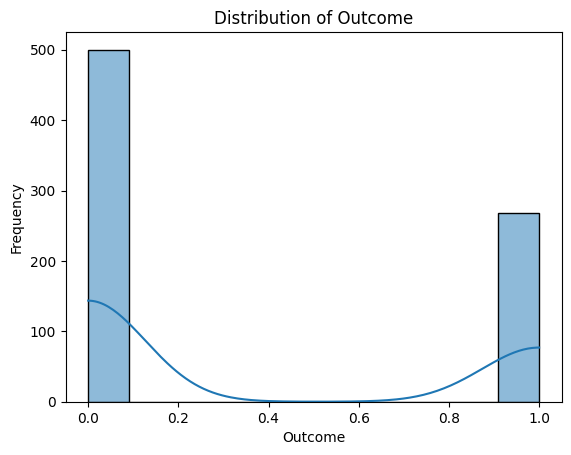

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = "Outcome"

sns.histplot(data[target_column], kde=True)  # kde adds a kernel density estimate
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')

<Axes: >

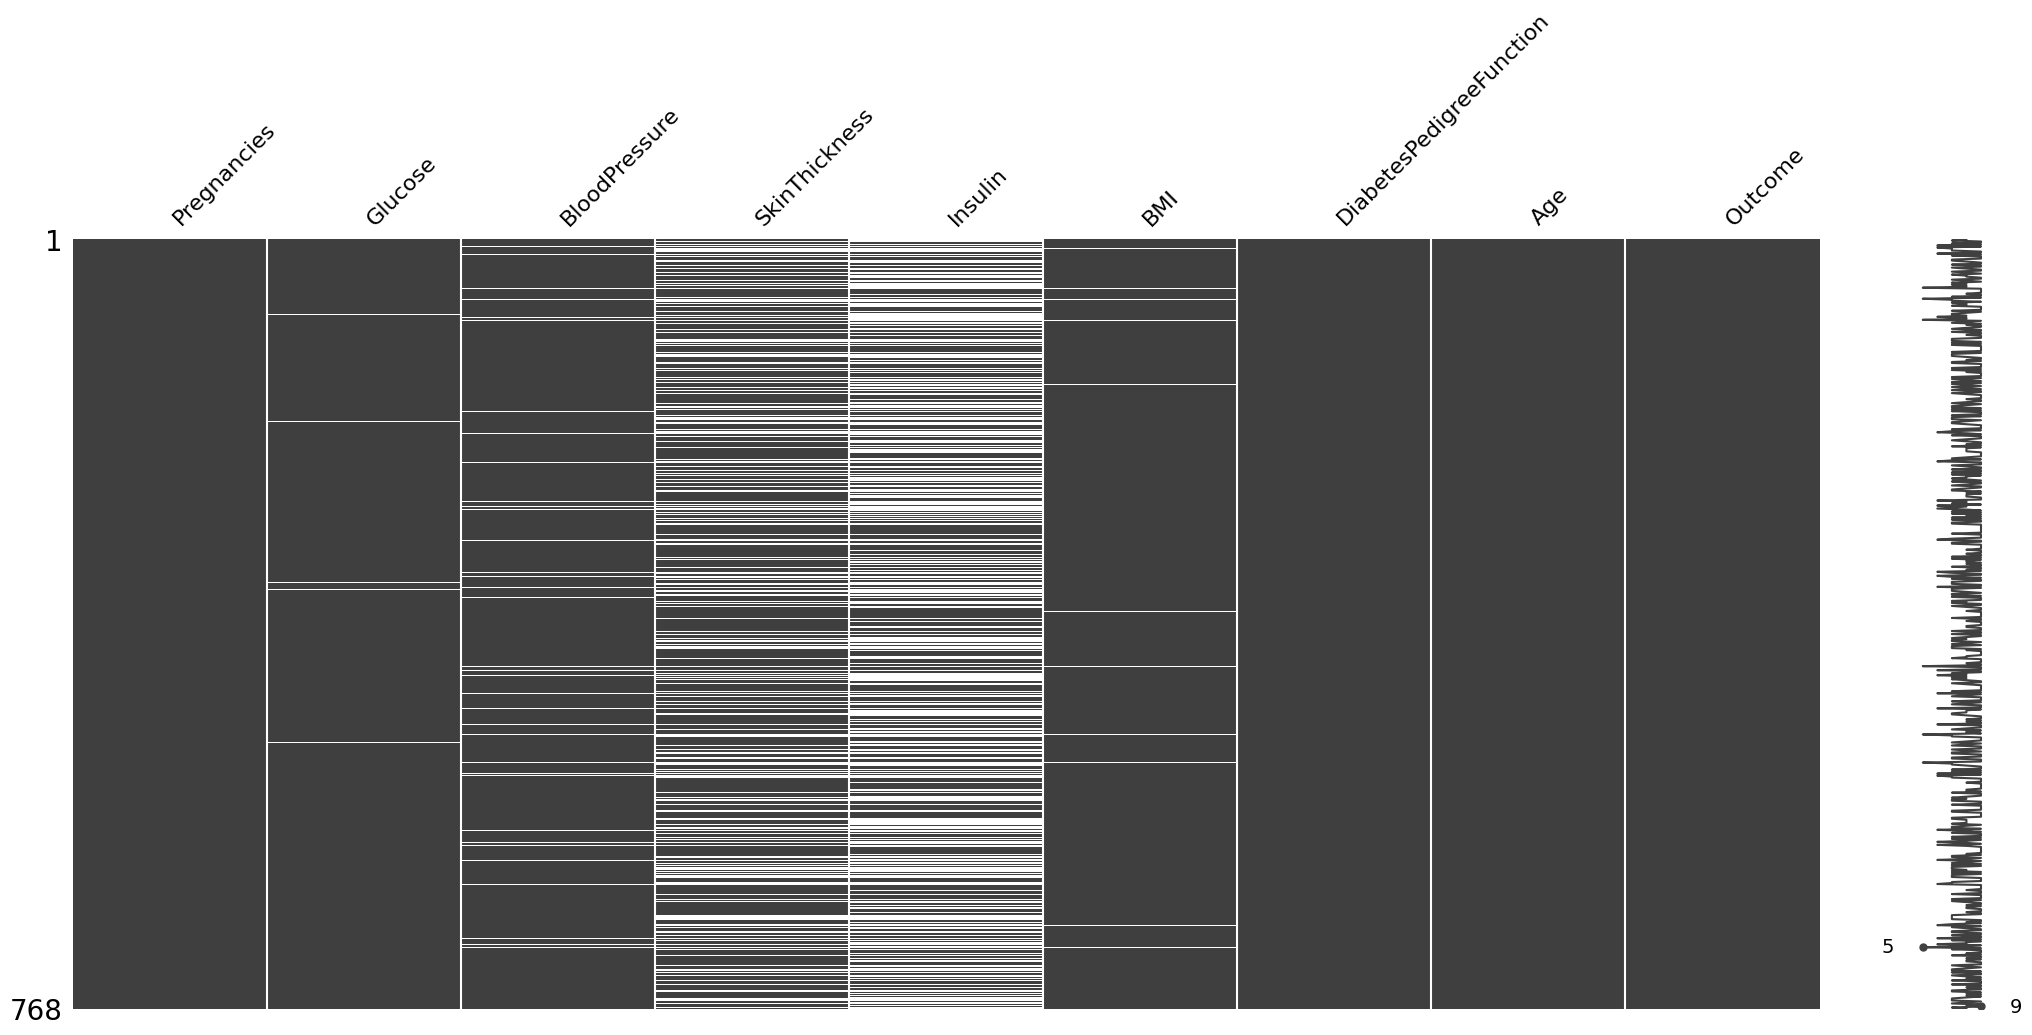

In [70]:
msno.matrix(data)

<Axes: >

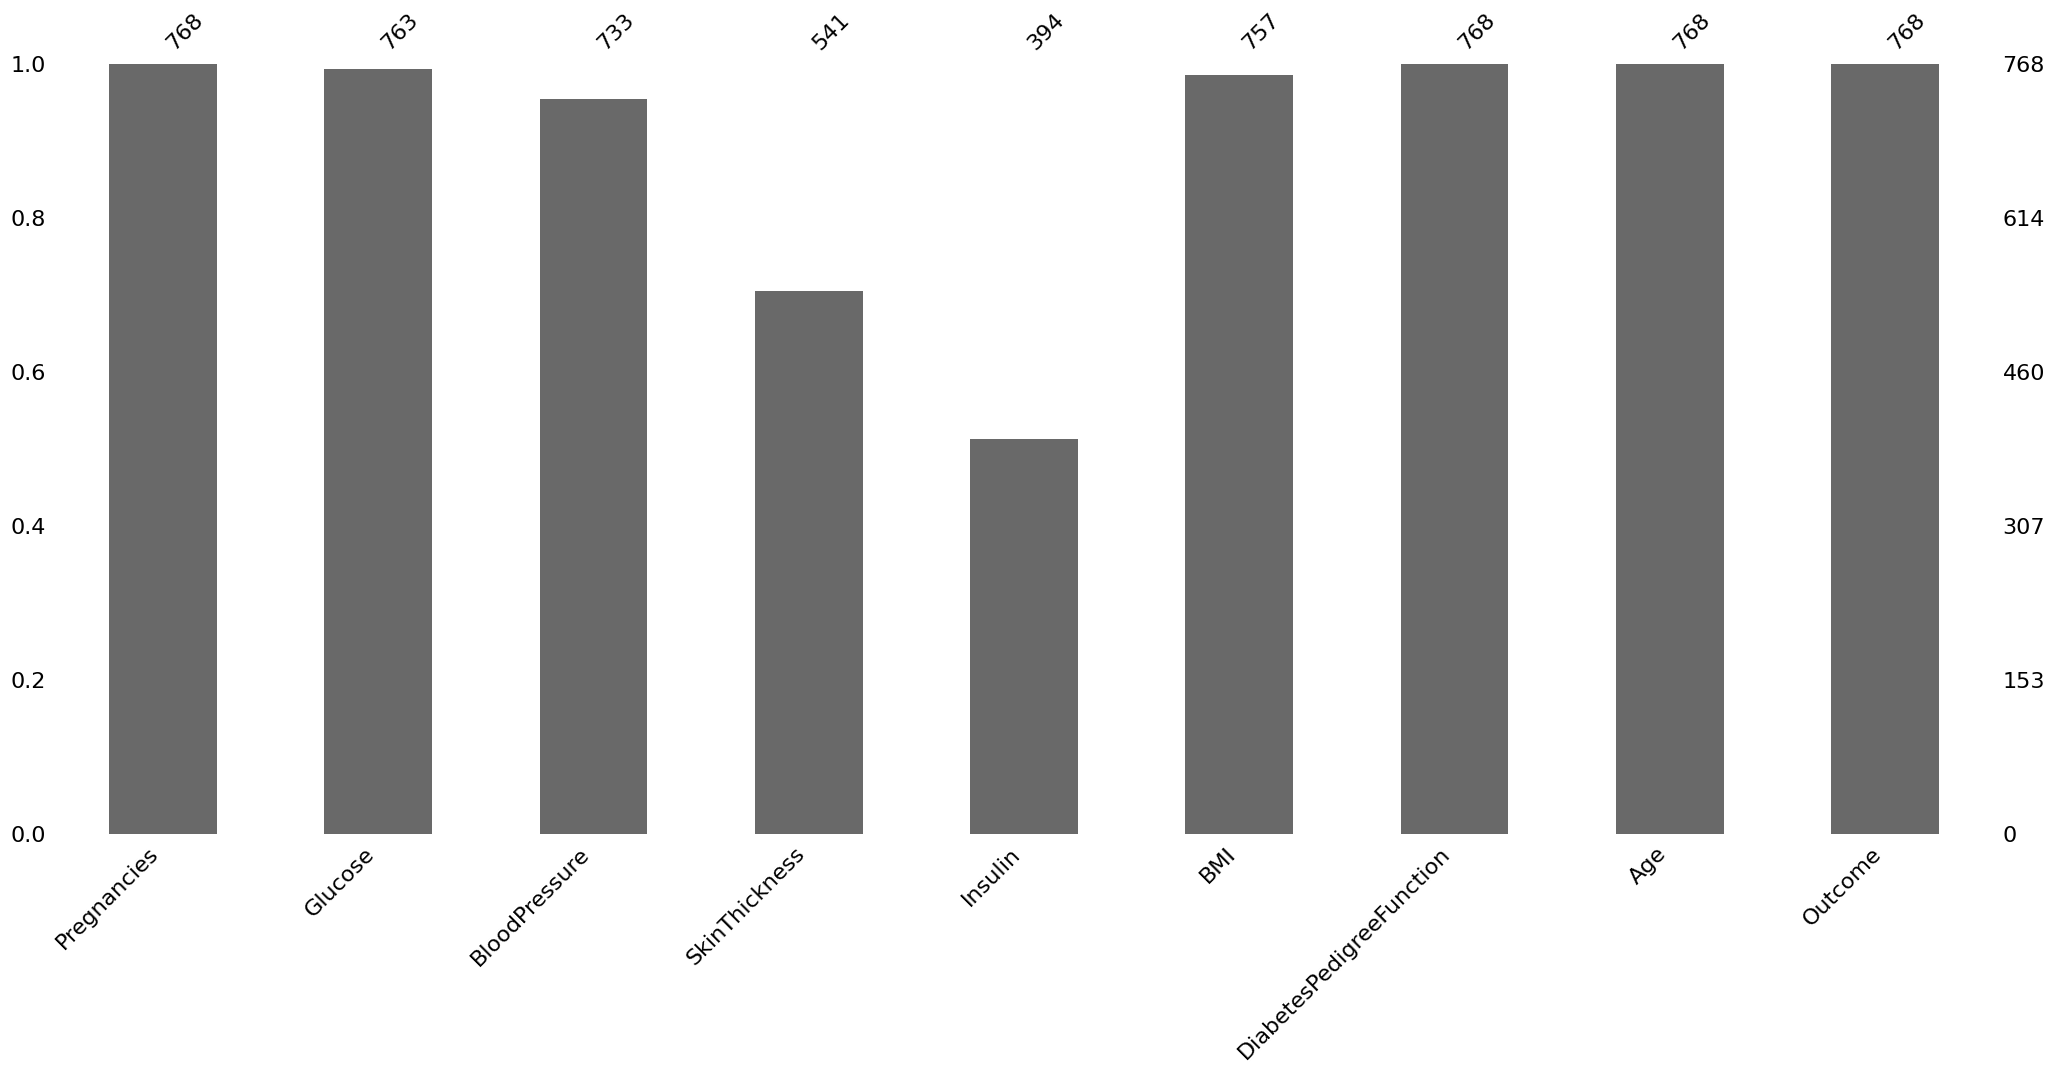

In [71]:
msno.bar(data)

<Axes: >

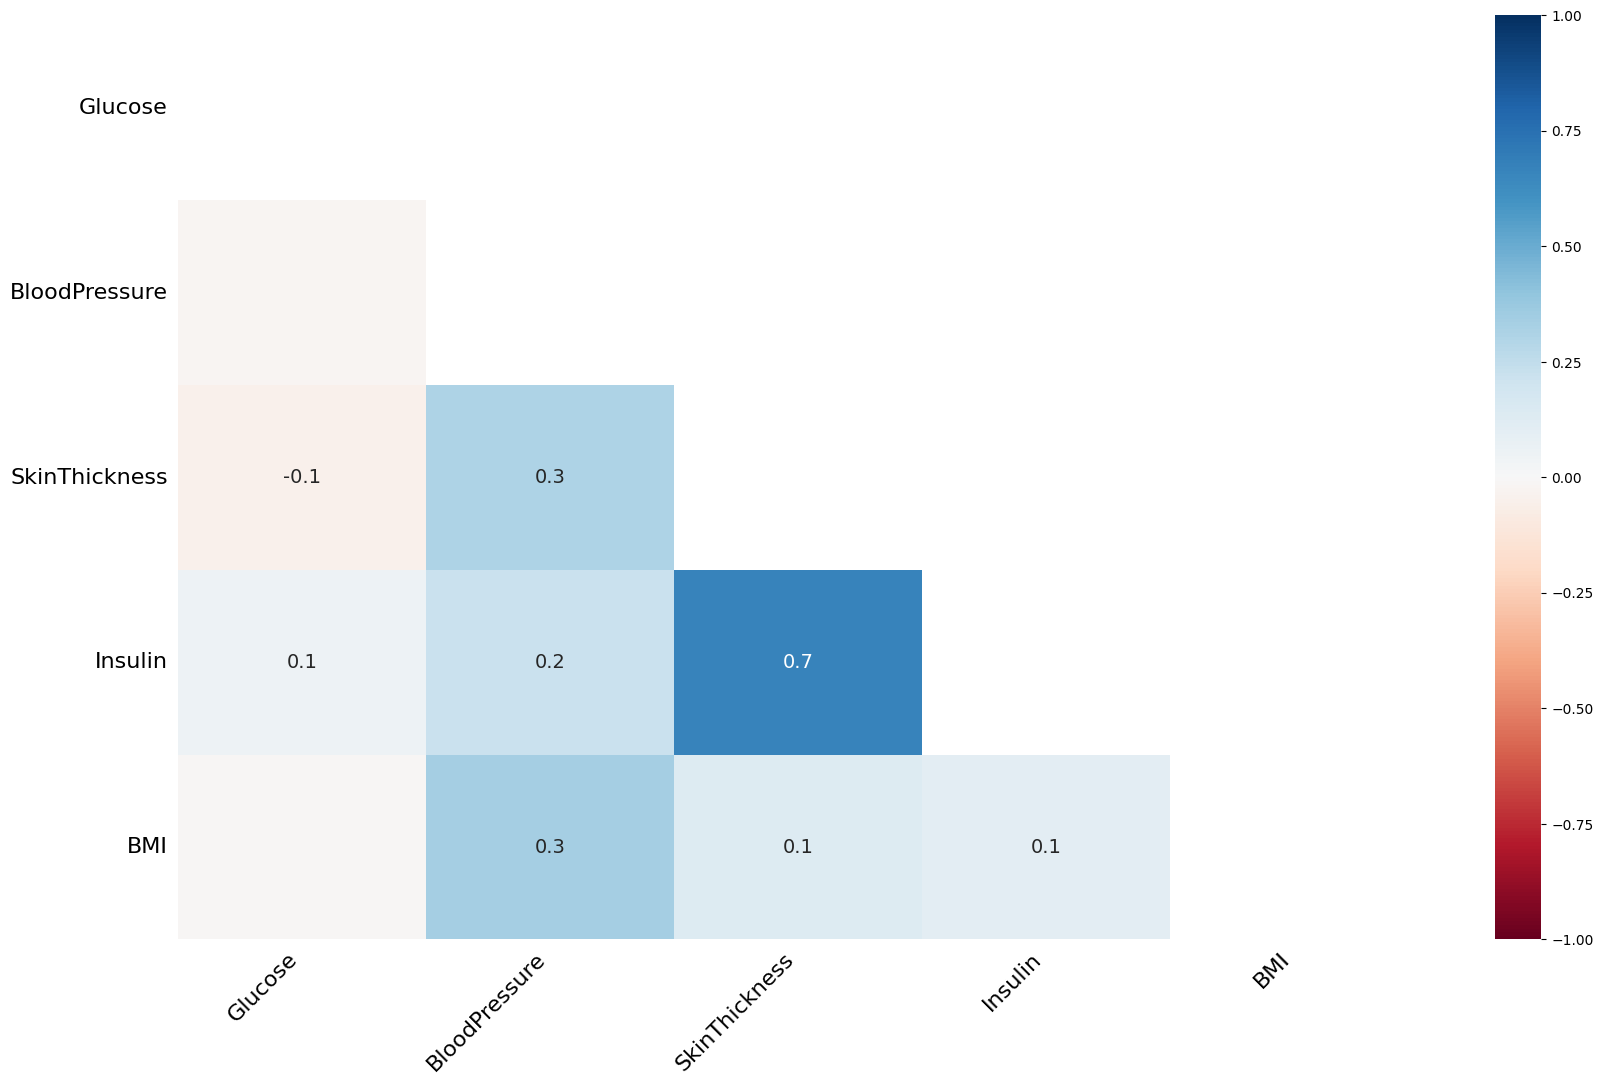

In [72]:
msno.heatmap(data)

<Axes: >

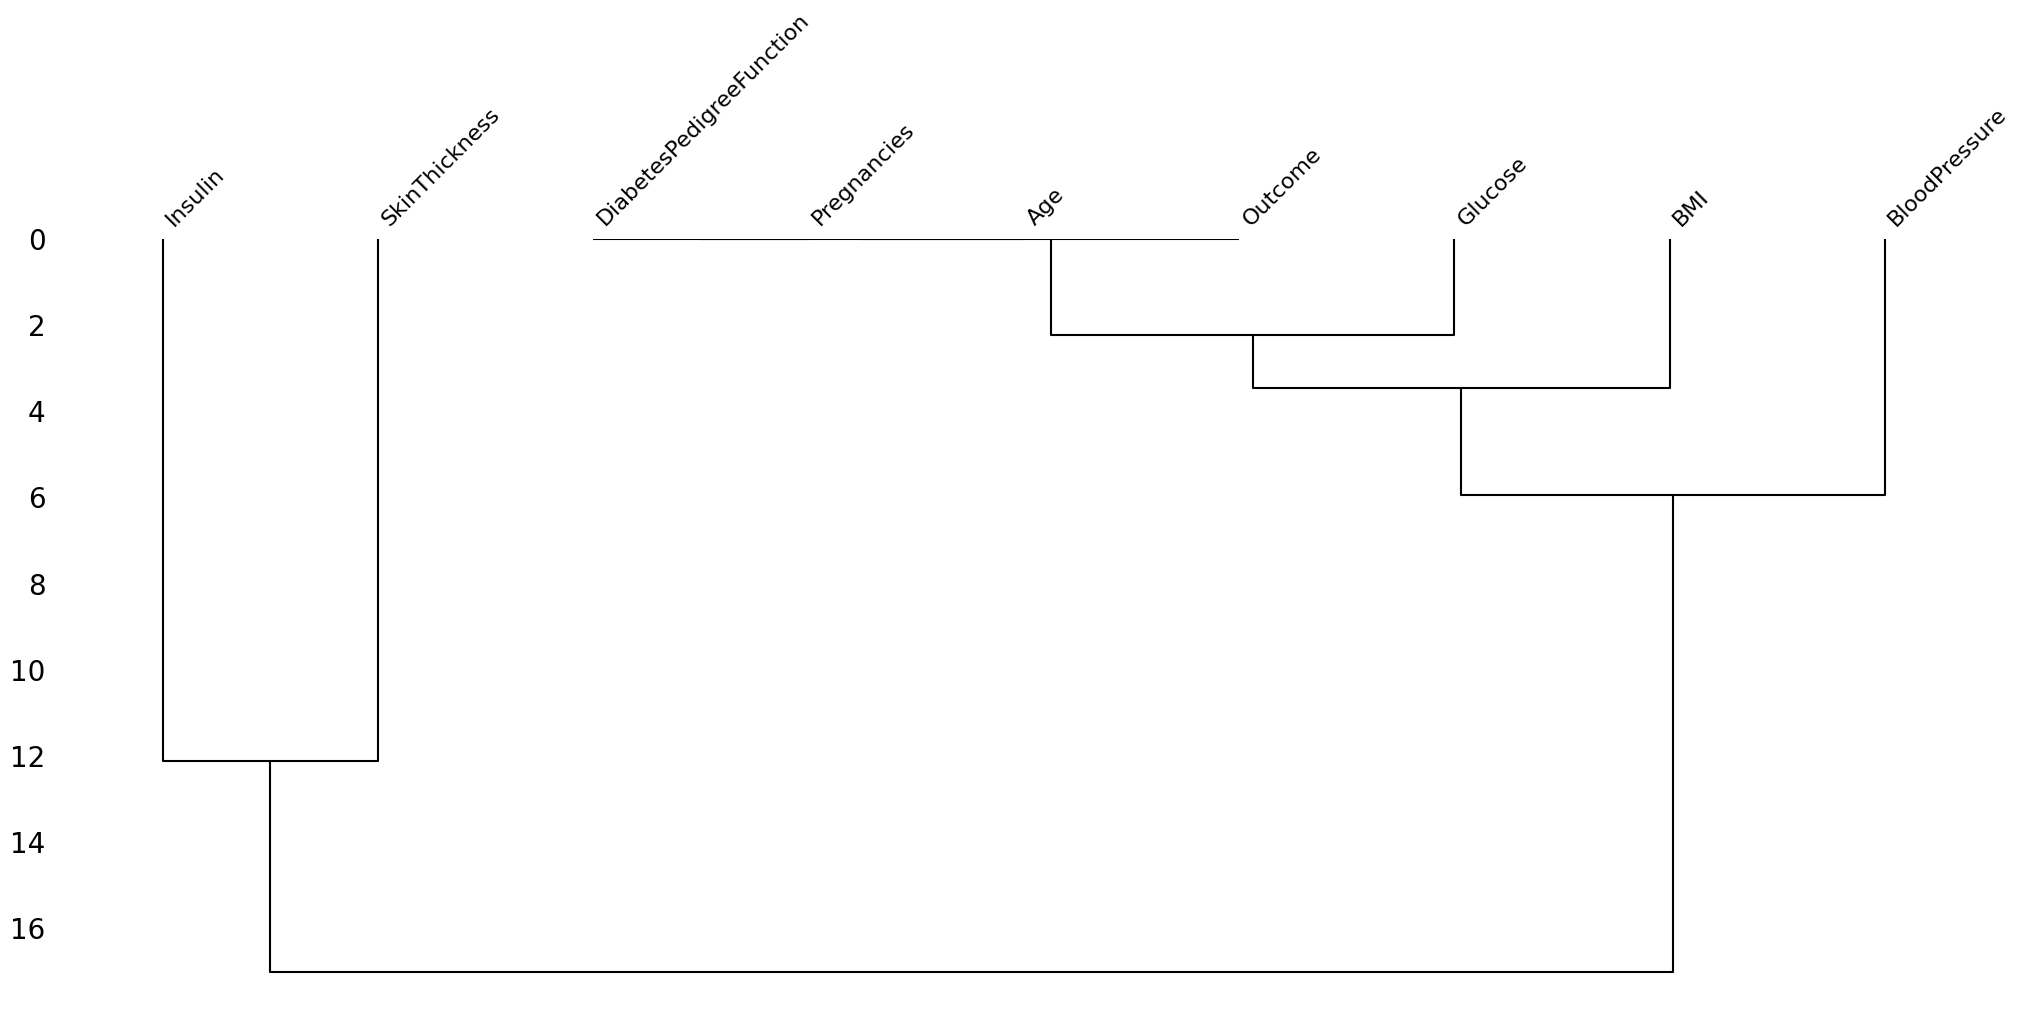

In [73]:
msno.dendrogram(data)

In [74]:
percent_missing = data.isnull().sum() * 100 / len(data)

print(percent_missing)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


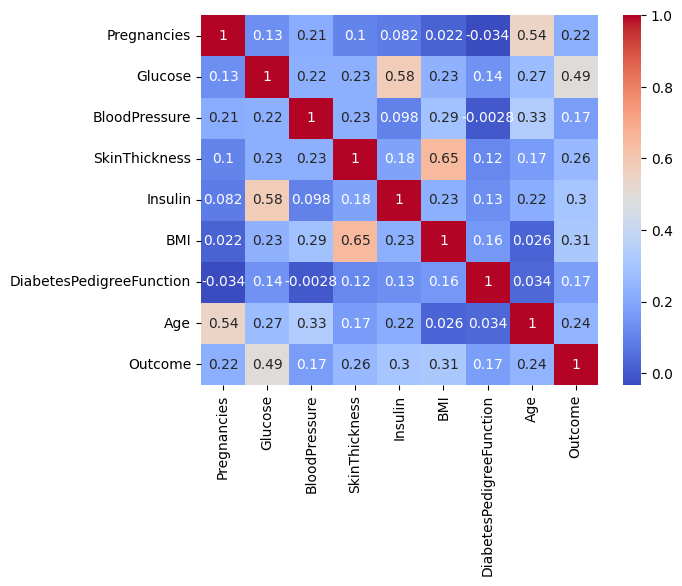

In [75]:
correlation_matrix = data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [76]:
data.dropna(subset=["Glucose", "BloodPressure", "BMI"], inplace=True)

In [77]:
data[['SkinThickness','Insulin']] = data[['SkinThickness','Insulin']].replace(0, np.nan)

In [82]:
percent_missing = data.isnull().sum() * 100 / len(data)

print(percent_missing)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_copy = data.copy()
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_values = imputer.fit_transform(data_copy)

In [80]:
data_copy.loc[:, :] = imputed_values
data = data_copy

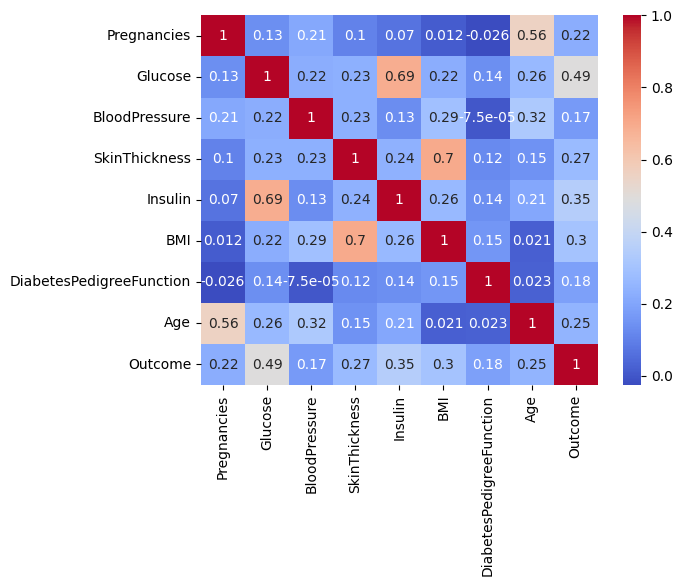

In [81]:
correlation_matrix = data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()